In [2]:
from google.colab import files
import numpy as np

uploaded = files.upload()

# Load the image and label data (modify this to your specific file format)
image_file = 'TrainingImages'  # Adjust this to match the file name of your uploaded images
label_file = 'TrainingLabels'  # Adjust this to match the file name of your uploaded labels
mnist='loadMNIST_py'


Saving loadMNIST_py.txt to loadMNIST_py.txt
Saving TrainingImages to TrainingImages
Saving TrainingLabels to TrainingLabels


In [3]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression objective function
def logistic_regression_objective(w, b, X, y):
    m = X.shape[1]  # Number of samples
    z = np.dot(w.T, X) + b  # Linear combination of weights and input
    y_pred = sigmoid(z)  # Prediction using sigmoid
    # Logistic regression objective (negative log-likelihood)
    objective = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m
    return objective

# Gradient of the logistic regression objective
def logistic_regression_gradient(w, b, X, y):
    m = X.shape[1]  # Number of samples
    z = np.dot(w.T, X) + b
    y_pred = sigmoid(z)
    # Gradient with respect to weights w
    grad_w = np.dot(X, (y_pred - y).T) / m
    # Gradient with respect to bias b
    grad_b = np.sum(y_pred - y) / m
    return grad_w, grad_b

# Hessian matrix of the logistic regression objective
def logistic_regression_hessian(w, b, X, y):
    m = X.shape[1]  # Number of samples
    z = np.dot(w.T, X) + b
    y_pred = sigmoid(z)
    # Diagonal matrix of the second derivative of the sigmoid
    S = np.diag((y_pred * (1 - y_pred)).flatten())
    # Hessian with respect to weights w
    H_w = np.dot(np.dot(X, S), X.T) / m
    # Hessian with respect to bias b is just the sum of the second derivative of the sigmoid
    H_b = np.sum(y_pred * (1 - y_pred)) / m
    return H_w, H_b

In [5]:
# Function to approximate the gradient using finite differences
def finite_difference_gradient(f, w, b, X, y, epsilon=1e-5):
    grad_w_approx = np.zeros_like(w)
    grad_b_approx = 0
    # Approximate gradient w.r.t. weights
    for i in range(len(w)):
        w_plus = w.copy()
        w_minus = w.copy()
        w_plus[i] += epsilon
        w_minus[i] -= epsilon
        f_plus = f(w_plus, b, X, y)
        f_minus = f(w_minus, b, X, y)
        grad_w_approx[i] = (f_plus - f_minus) / (2 * epsilon)
    # Approximate gradient w.r.t. bias
    f_b_plus = f(w, b + epsilon, X, y)
    f_b_minus = f(w, b - epsilon, X, y)
    grad_b_approx = (f_b_plus - f_b_minus) / (2 * epsilon)
    return grad_w_approx, grad_b_approx

# Function to approximate the Hessian using finite differences
def finite_difference_hessian(f_grad, w, b, X, y, epsilon=1e-5):
    n = len(w)
    H_w_approx = np.zeros((n, n))
    grad_w_orig, grad_b_orig = f_grad(w, b, X, y)
    # Approximate Hessian w.r.t. weights
    for i in range(n):
        w_perturb = w.copy()
        w_perturb[i] += epsilon
        grad_w_perturb, _ = f_grad(w_perturb, b, X, y)
        H_w_approx[:, i] = (grad_w_perturb - grad_w_orig) / epsilon
    return H_w_approx

# Test function to verify gradient and Hessian
def test_gradient_and_hessian():
    # Create random data for testing (ensuring labels are binary)
    np.random.seed(42)
    n = 5   # Number of features
    m = 10  # Number of samples
    X = np.random.randn(n, m)
    y = np.random.randint(0, 2, m)
    w = np.random.randn(n)
    b = np.random.randn()

    # Compute analytical gradient and Hessian
    grad_w_analytical, grad_b_analytical = logistic_regression_gradient(w, b, X, y)
    H_w_analytical, H_b_analytical = logistic_regression_hessian(w, b, X, y)

    # Compute numerical gradient and Hessian using finite differences
    grad_w_numerical, grad_b_numerical = finite_difference_gradient(logistic_regression_objective, w, b, X, y)
    H_w_numerical = finite_difference_hessian(logistic_regression_gradient, w, b, X, y)

    # Compare the analytical and numerical results
    print("Gradient Check:")
    print("Analytical Gradient (w):", grad_w_analytical)
    print("Numerical Gradient (w):", grad_w_numerical)
    print("Gradient w.r.t bias (b):")
    print("Analytical:", grad_b_analytical, "Numerical:", grad_b_numerical)
    print("\nHessian Check (w):")
    print("Analytical Hessian (w):\n", H_w_analytical)
    print("Numerical Hessian (w):\n", H_w_numerical)

# Run the test
test_gradient_and_hessian()


Gradient Check:
Analytical Gradient (w): [ 0.15443585 -0.02642365  0.09016346  0.15020679 -0.04769366]
Numerical Gradient (w): [ 0.15443585 -0.02642365  0.09016346  0.15020679 -0.04769366]
Gradient w.r.t bias (b):
Analytical: 0.1474011113571517 Numerical: 0.14740111135558287

Hessian Check (w):
Analytical Hessian (w):
 [[ 0.08119715 -0.03569126 -0.01115607 -0.03469723 -0.00303602]
 [-0.03569126  0.11599964  0.03406195 -0.03224755  0.07874205]
 [-0.01115607  0.03406195  0.09111665 -0.04954382  0.059     ]
 [-0.03469723 -0.03224755 -0.04954382  0.19596315 -0.05130129]
 [-0.00303602  0.07874205  0.059      -0.05130129  0.12145032]]
Numerical Hessian (w):
 [[ 0.08119741 -0.03569109 -0.01115592 -0.03469709 -0.0030359 ]
 [-0.03569147  0.11599912  0.0340618  -0.03224764  0.07874167]
 [-0.01115625  0.03406172  0.09111653 -0.04954379  0.05899991]
 [-0.0346973  -0.03224752 -0.04954385  0.19596267 -0.05130131]
 [-0.00303608  0.07874165  0.05899995 -0.05130118  0.12144995]]


In [6]:
import numpy as np
import struct
from array import array
import matplotlib.pyplot as plt

# MNIST Data Loader Class
class MnistDataloader:
    def __init__(self, images_filepath, labels_filepath):
        self.images_filepath = images_filepath
        self.labels_filepath = labels_filepath

    def read_images_labels(self):
        labels = []
        with open(self.labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(f'Magic number mismatch, expected 2049, got {magic}')
            labels = array("B", file.read())

        with open(self.images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(f'Magic number mismatch, expected 2051, got {magic}')
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(rows, cols)  # MNIST images are 28x28
            images.append(img)

        return np.array(images), np.array(labels)

# File paths (adjust the names if needed)
images_filepath = 'TrainingImages'
labels_filepath = 'TrainingLabels'

# Load the data
mnist_loader = MnistDataloader(images_filepath, labels_filepath)
x_train, y_train = mnist_loader.read_images_labels()

# Print the shape of the data to verify
print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")



Training images shape: (10000, 28, 28)
Training labels shape: (10000,)


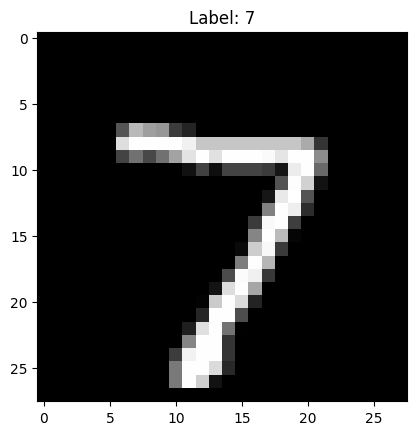

In [7]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0

# Print the first image and label as a sanity check
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()


In [8]:
# Example: Feed x_train and y_train to a model or use in your processing pipeline

# If you're using TensorFlow/Keras, for example:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7575 - loss: 0.8763
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9289 - loss: 0.2471
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1643
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9644 - loss: 0.1253
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0855


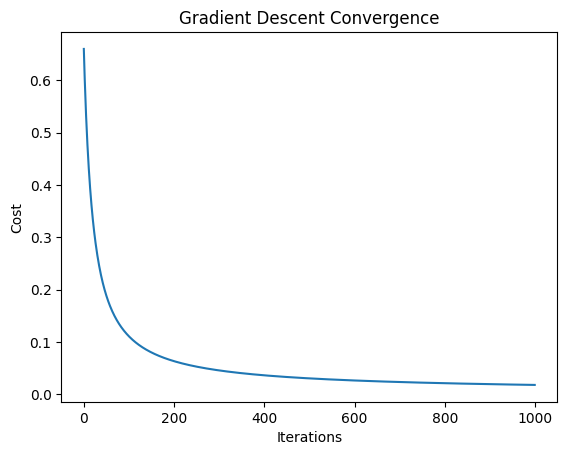

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the images
X_flat = x_train.reshape(x_train.shape[0], -1)

# Select a binary classification problem (e.g., digits 0 and 1)
indices = np.where((y_train == 0) | (y_train == 1))
X = X_flat[indices]
y = y_train[indices]

# Convert y to binary (0 or 1)
y = (y == 1).astype(int).reshape(-1, 1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Compute the gradient for logistic regression
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * X.T @ (h - y)
    return gradient

# Gradient Descent for logistic regression
def gradient_descent(X, y, theta, alpha, num_iters):
    cost_history = []
    for i in range(num_iters):
        gradient = compute_gradient(X, y, theta)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost.flatten())  # Ensure cost is a 1D array
    return theta, np.array(cost_history).flatten()

# Initialize theta (parameters)
theta_initial = np.zeros((X.shape[1], 1))

# Run gradient descent
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations
theta_optimized, cost_history = gradient_descent(X, y, theta_initial, alpha, num_iters)

# Plot the cost history to visualize convergence
plt.plot(cost_history)
plt.title('Gradient Descent Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()



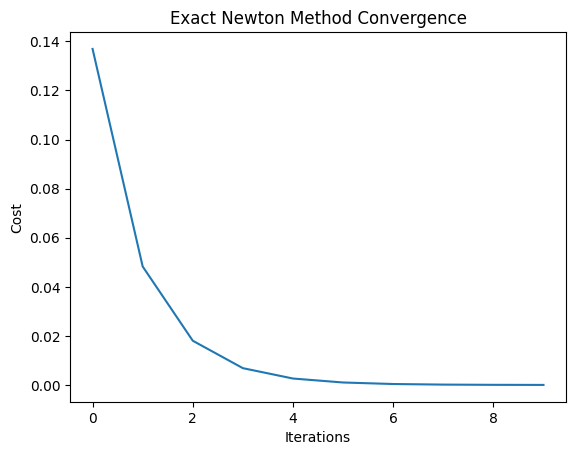

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Compute the gradient for logistic regression
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * X.T @ (h - y)
    return gradient

# Compute the Hessian matrix for logistic regression
def compute_hessian(X, y, theta, reg_lambda=1e-5):
    m = len(y)
    h = sigmoid(X @ theta)
    diag = np.diag((h * (1 - h)).flatten())
    H = (1/m) * X.T @ diag @ X
    reg_identity = reg_lambda * np.eye(H.shape[0])  # Regularization term
    H += reg_identity  # Adding regularization to the Hessian
    return H

# Exact Newton method for logistic regression
def newton_method(X, y, theta, num_iters, reg_lambda=1e-5):
    cost_history = []
    for i in range(num_iters):
        gradient = compute_gradient(X, y, theta)
        H = compute_hessian(X, y, theta, reg_lambda)
        theta -= np.linalg.inv(H) @ gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost.flatten())  # Ensure cost is a 1D array
    return theta, np.array(cost_history).flatten()

# Initialize theta (parameters)
theta_initial = np.zeros((X.shape[1], 1))

# Run Newton's method
num_iters = 10  # Number of iterations
theta_optimized_newton, cost_history_newton = newton_method(X, y, theta_initial, num_iters)

# Plot the cost history to visualize convergence
plt.plot(cost_history_newton)
plt.title('Exact Newton Method Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
